In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 




In [52]:
train_data=pd.read_csv('Data/train.csv');
train_data.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


 Null **Values**

In [53]:
null_vals=train_data.isnull().sum()>0
null_vals=pd.DataFrame({'Features':train_data.columns,'Nullity':null_vals})
null_cols=null_vals[null_vals['Nullity']==True]
list_null_cols=list(null_cols['Features'])
list_null_cols

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'turbine_status',
 'cloud_level',
 'blade_length(m)',
 'windmill_height(m)',
 'windmill_generated_power(kW/h)']

In [54]:
null_vals=train_data.isnull().sum()
types=train_data.dtypes
data_info=[null_vals,types]
data_info

[tracking_id                          0
 datetime                             0
 wind_speed(m/s)                    273
 atmospheric_temperature(°C)       3450
 shaft_temperature(°C)                2
 blades_angle(°)                    216
 gearbox_temperature(°C)              1
 engine_temperature(°C)              12
 motor_torque(N-m)                   24
 generator_temperature(°C)           12
 atmospheric_pressure(Pascal)      2707
 area_temperature(°C)                 0
 windmill_body_temperature(°C)     2363
 wind_direction(°)                 5103
 resistance(ohm)                      1
 rotor_torque(N-m)                  572
 turbine_status                    1759
 cloud_level                        276
 blade_length(m)                   5093
 blade_breadth(m)                     0
 windmill_height(m)                 543
 windmill_generated_power(kW/h)     207
 dtype: int64, tracking_id                        object
 datetime                           object
 wind_speed(m/s)    

In [55]:
a=train_data['atmospheric_pressure(Pascal)']
a

0        103402.961872
1         17030.904078
2         16125.927107
3         18689.732336
4        114468.169007
             ...      
28195     19428.725079
28196     16596.485400
28197     19083.881449
28198     18360.785707
28199   -256507.547672
Name: atmospheric_pressure(Pascal), Length: 28200, dtype: float64

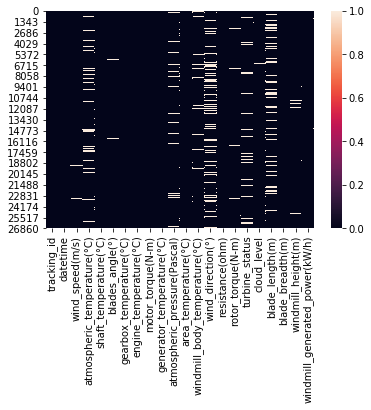

In [56]:
sns.heatmap(train_data.isnull())

1.wind_speed

In [57]:
data_wind=train_data[list_null_cols[0]]
d_wind=data_wind.describe()
nega_wind=train_data[train_data[list_null_cols[0]]<0]

wind_det={'Total':len(data_wind),'Negative':len(nega_wind),'Null':null_vals[list_null_cols[0]]}
d_wind


count    27927.000000
mean        69.037071
std         76.275645
min       -496.211029
25%         20.883502
50%         93.302129
75%         95.268058
max        601.455670
Name: wind_speed(m/s), dtype: float64

In [58]:
full_list=[]
names=[]
wind_det={}

for i in list_null_cols:
    if(i=="turbine_status" or i=="cloud_level"):
        pass
    else:
      names.append(i)
      data_wind=train_data[i]
      d_wind=data_wind.describe()
      nega_wind=train_data[train_data[i]<0]
      if(len(nega_wind)>0):
          wind_det={'Total':len(data_wind),'Negative':len(nega_wind),'Null':null_vals[i]}
          print(i,'--->',wind_det,end='\n')
        



wind_speed(m/s) ---> {'Total': 28200, 'Negative': 2142, 'Null': 273}
atmospheric_temperature(°C) ---> {'Total': 28200, 'Negative': 4199, 'Null': 3450}
shaft_temperature(°C) ---> {'Total': 28200, 'Negative': 1417, 'Null': 2}
blades_angle(°) ---> {'Total': 28200, 'Negative': 15475, 'Null': 216}
gearbox_temperature(°C) ---> {'Total': 28200, 'Negative': 3091, 'Null': 1}
atmospheric_pressure(Pascal) ---> {'Total': 28200, 'Negative': 3282, 'Null': 2707}
windmill_body_temperature(°C) ---> {'Total': 28200, 'Negative': 4662, 'Null': 2363}
resistance(ohm) ---> {'Total': 28200, 'Negative': 616, 'Null': 1}
rotor_torque(N-m) ---> {'Total': 28200, 'Negative': 2437, 'Null': 572}
blade_length(m) ---> {'Total': 28200, 'Negative': 1441, 'Null': 5093}
windmill_height(m) ---> {'Total': 28200, 'Negative': 149, 'Null': 543}


In [59]:
dets={}
for i in list_null_cols:
    nn=len(train_data[train_data[i]==-99])
    if(nn>0):
        val_c=train_data[train_data[i]<0][i].value_counts()
        print(i,'-99 -> ',nn,'\n- count \n',val_c,end='\n')

atmospheric_temperature(°C) -99 ->  3942 
- count 
 -99.000000    3942
-9.026606        1
-26.221296       1
-22.510949       1
-9.393385        1
              ... 
-0.032304        1
-15.795997       1
-10.476060       1
-0.659286        1
-13.383701       1
Name: atmospheric_temperature(°C), Length: 258, dtype: int64
shaft_temperature(°C) -99 ->  557 
- count 
 -99.000000    557
-5.000000       9
-8.874725       1
-7.919913       1
-3.398025       1
             ... 
-1.427972       1
-54.281080      1
-1.838388       1
-3.084143       1
-9.817638       1
Name: shaft_temperature(°C), Length: 853, dtype: int64
blades_angle(°) -99 ->  5151 
- count 
 -99.000000    5151
-1.017868        1
-1.067371        1
-1.132864        1
-0.983848        1
              ... 
-0.735481        1
-1.125019        1
-1.138273        1
-0.904955        1
-1.091377        1
Name: blades_angle(°), Length: 10325, dtype: int64
gearbox_temperature(°C) -99 ->  272 
- count 
 -99.000000     272
-5.000000     

0

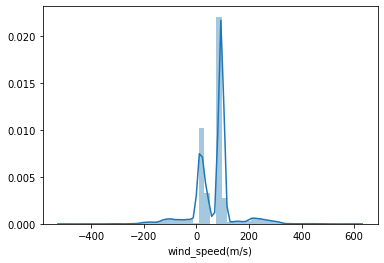

In [60]:
sns.distplot(train_data[list_null_cols[0]])
wspeed_mean=np.mean(train_data[list_null_cols[0]])
train_data[list_null_cols[0]]=train_data[list_null_cols[0]].fillna(wspeed_mean)
train_data[list_null_cols[0]].isnull().sum()


In [61]:
train_data[list_null_cols[1]].value_counts()
d_atmtemp=train_data[list_null_cols[1]].describe()
train_data[list_null_cols[1]]=train_data[list_null_cols[1]].replace(-99,np.mean(train_data[list_null_cols[1]]))
d_atmtemp=train_data[list_null_cols[1]].describe()
train_data[list_null_cols[1]]=train_data[list_null_cols[1]].fillna(np.mean(train_data[list_null_cols[1]]))

train_data[list_null_cols[1]].isnull().sum()




0

In [62]:
train_data[list_null_cols[2]].value_counts()
d_shafttemp=train_data[list_null_cols[2]].describe()
train_data[list_null_cols[2]]=train_data[list_null_cols[2]].replace([-99,-5,-53],-1)
train_data[list_null_cols[2]]=train_data[list_null_cols[1]].fillna(np.mean(train_data[list_null_cols[2]]))

train_data[list_null_cols[2]].describe()
train_data[list_null_cols[2]].isnull().sum()




0

In [63]:
train_data[list_null_cols[3]].value_counts()
d_atmtemp=train_data[list_null_cols[3]].describe()
train_data[list_null_cols[3]]=train_data[list_null_cols[3]].replace(-99,np.mean(train_data[list_null_cols[3]]))
d_angle=train_data[list_null_cols[3]].describe()
train_data[list_null_cols[3]]=train_data[list_null_cols[3]].fillna(np.mean(train_data[list_null_cols[3]]))

train_data[list_null_cols[3]].isnull().sum()


0

In [64]:
list_null_cols1=[]

for i in list_null_cols:
    if(i == 'turbine_status'
 or i=='cloud_level'):
        pass
    else:
        list_null_cols1.append(i)

In [65]:
list_null_cols1

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'windmill_height(m)',
 'windmill_generated_power(kW/h)']

In [66]:
for i in list_null_cols1:
            nn=len(train_data[train_data[i]==-99])
            if(nn>0):
                    train_data[i]=train_data[i].replace(-99,np.mean(train_data[i]))
                
            
            train_data[i]=train_data[i].fillna(np.mean(train_data[i]))

In [67]:
train_data.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                      0
atmospheric_temperature(°C)          0
shaft_temperature(°C)                0
blades_angle(°)                      0
gearbox_temperature(°C)              0
engine_temperature(°C)               0
motor_torque(N-m)                    0
generator_temperature(°C)            0
atmospheric_pressure(Pascal)         0
area_temperature(°C)                 0
windmill_body_temperature(°C)        0
wind_direction(°)                    0
resistance(ohm)                      0
rotor_torque(N-m)                    0
turbine_status                    1759
cloud_level                        276
blade_length(m)                      0
blade_breadth(m)                     0
windmill_height(m)                   0
windmill_generated_power(kW/h)       0
dtype: int64

In [68]:
train_data['turbine_status']=train_data['turbine_status'].fillna('X')


In [69]:
def change(x):
    if(x=='Extremely Low'):
        return 'Low'
    if(x=='Low'):
        return 'Low'
            
    return 'Medium'


train_data['cloud_level']= train_data['cloud_level'].apply(lambda x : change(x))

In [70]:
train_data['cloud_level']=train_data['cloud_level'].fillna('New')

In [71]:
train_data.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
dtype: int64

In [72]:
def y(x):
    x=x.split('-')
    return int(x[0])

def t(x):
    x=x.split('-')
    return int(x[1])

train_data['Yr']=train_data['datetime'].apply(lambda x:y(x))
train_data['Mon']=train_data['datetime'].apply(lambda x:t(x))


In [73]:
train_data['datetime'].head()

def extract_time(x):
    p= x.split(' ')[1]
    return int(p.split(':')[0])



train_data['time']=train_data['datetime'].apply(lambda x : extract_time(x))


In [74]:
train_data.time.nunique()

24

In [75]:
ocols=['turbine_status', 'cloud_level']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ocols:
    train_data[i]=le.fit_transform(train_data[i])
   




In [76]:
train_data.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),Yr,Mon,time
0,WM_33725,2019-08-04 14:33:20,94.820023,0.383727,0.383727,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,42.084666,8,1,2.217542,0.314065,24.281689,6.766521,2019,8,14
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,27.764785,-9.654038,44.104919,46.258870,2372.384119,78.129803,...,107.888643,1,1,4.210346,0.448494,27.262139,5.966275,2018,11,10
2,WM_39146,2019-09-14 14:03:20,95.484724,16.212844,16.212844,12.652763,42.322098,42.878552,1657.169646,67.654469,...,-42.931459,4,1,2.719475,0.302321,27.366127,2.874342,2019,9,14
3,WM_6757,2018-12-25 15:33:20,238.819424,0.383727,0.383727,15.115323,44.759643,47.282101,2888.134079,95.389974,...,42.744596,4,1,4.857385,0.367140,24.287767,14.851089,2018,12,15
4,WM_21521,2019-05-04 03:13:20,10.722890,16.212844,16.212844,1.715696,-17.616459,43.469852,781.695419,37.423065,...,13.387289,2,1,3.459074,0.453374,27.971650,3.519074,2019,5,3


In [77]:
train_data.corr()['windmill_generated_power(kW/h)'].sort_values(ascending=False)

windmill_generated_power(kW/h)    1.000000
motor_torque(N-m)                 0.503155
generator_temperature(°C)         0.390092
area_temperature(°C)              0.383173
wind_direction(°)                 0.311539
resistance(ohm)                   0.273837
engine_temperature(°C)            0.271819
rotor_torque(N-m)                 0.226086
blade_breadth(m)                  0.085642
wind_speed(m/s)                   0.062246
gearbox_temperature(°C)           0.057017
time                              0.046570
cloud_level                       0.031026
blade_length(m)                   0.029917
windmill_body_temperature(°C)     0.021542
shaft_temperature(°C)             0.003949
atmospheric_temperature(°C)       0.003949
windmill_height(m)                0.003855
atmospheric_pressure(Pascal)     -0.012578
turbine_status                   -0.013046
Mon                              -0.103676
Yr                               -0.137100
blades_angle(°)                  -0.308948
Name: windm

In [78]:
#WM_15676
def track(x):
    return int(x.split('_')[1])
track('WM_15676')


train_data['track']=train_data['tracking_id'].apply(lambda x : track(x))
train_data['track'].head()

0    33725
1      698
2    39146
3     6757
4    21521
Name: track, dtype: int64

In [79]:
#Select Features

from sklearn.feature_selection import SelectKBest,chi2,f_classif

#SELECT BEST PARAMETERS



X=train_data.drop(['windmill_generated_power(kW/h)','tracking_id','datetime'],axis=1)
Y=train_data['windmill_generated_power(kW/h)']

feat=SelectKBest(k='all')
selector=feat.fit(X,Y)


cols=X.columns
df_features = pd.DataFrame(cols)
df_scores = pd.DataFrame(selector.scores_)

df_new = pd.concat([df_features, df_scores], axis=1)
df_new.columns = ['Features', 'Score']

df_new = df_new.sort_values(by='Score', ascending=False)

imp_feature=df_new['Features'].to_list()
final_feats=list(df_new['Features'][:17])
final_feats

['track',
 'windmill_body_temperature(°C)',
 'engine_temperature(°C)',
 'blade_breadth(m)',
 'wind_speed(m/s)',
 'rotor_torque(N-m)',
 'resistance(ohm)',
 'time',
 'gearbox_temperature(°C)',
 'cloud_level',
 'shaft_temperature(°C)',
 'atmospheric_temperature(°C)',
 'turbine_status',
 'blade_length(m)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'blades_angle(°)']

In [80]:
X=train_data[final_feats]
Y=train_data['windmill_generated_power(kW/h)']

In [81]:

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV



In [82]:
#Model


from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
import joblib 
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import joblib
import xgboost




lr=LinearRegression()
lr.fit(X,Y)

lgbm1=xgboost.XGBRegressor(min_child_weight = 7,  max_depth=  12,
                           learning_rate=0.1, gamma= 0.1, colsample_bytree= 0.5)
lgbm1.fit(X,Y)


print('CROSS-VAL-SCORE',cross_val_score(lgbm1,X,Y,cv=10).mean())



CROSS-VAL-SCORE 0.9601690351929945


In [83]:
#Test Data Manipulation
test_data=pd.read_csv('Data/test.csv');
test_data.head()


,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [84]:
null_vals=test_data.isnull().sum()>0
null_vals=pd.DataFrame({'Features':test_data.columns,'Nullity':null_vals})
null_cols=null_vals[null_vals['Nullity']==True]
list_null_colst=list(null_cols['Features'])
list_null_colst

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'rotor_torque(N-m)',
 'turbine_status',
 'cloud_level',
 'blade_length(m)',
 'windmill_height(m)']

In [85]:
test_data[list_null_cols[1]].value_counts()
d_atmtemp=test_data[list_null_cols[1]].describe()
test_data[list_null_cols[1]]=test_data[list_null_cols[1]].replace(-99,np.mean(test_data[list_null_cols[1]]))
d_atmtemp=test_data[list_null_cols[1]].describe()
test_data[list_null_cols[1]]=test_data[list_null_cols[1]].fillna(np.mean(test_data[list_null_cols[1]]))

test_data[list_null_cols[1]].isnull().sum()




test_data[list_null_cols[2]].value_counts()
d_shafttemp=test_data[list_null_cols[2]].describe()
test_data[list_null_cols[2]]=test_data[list_null_cols[2]].replace([-99,-5,-53],-1)
test_data[list_null_cols[2]]=test_data[list_null_cols[1]].fillna(np.mean(test_data[list_null_cols[2]]))

test_data[list_null_cols[2]].describe()
test_data[list_null_cols[2]].isnull().sum()




test_data[list_null_cols[3]].value_counts()
d_atmtemp=test_data[list_null_cols[3]].describe()
test_data[list_null_cols[3]]=test_data[list_null_cols[3]].replace(-99,np.mean(test_data[list_null_cols[3]]))
d_angle=test_data[list_null_cols[3]].describe()
test_data[list_null_cols[3]]=test_data[list_null_cols[3]].fillna(np.mean(test_data[list_null_cols[3]]))

test_data[list_null_cols[3]].isnull().sum()


0

In [86]:
list_null_colst1=[]

for i in list_null_colst:
    if(i == 'turbine_status'
 or i=='cloud_level'):
        pass
    else:
        list_null_colst1.append(i)
list_null_colst1

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'windmill_height(m)']

In [87]:
for i in list_null_colst1:
            print(i)
            nn=len(test_data[test_data[i]==-99])
            if(nn>0):
                    test_data[i]=test_data[i].replace(-99,np.mean(test_data[i]))
                
            
            test_data[i]=test_data[i].fillna(np.mean(test_data[i]))

wind_speed(m/s)
atmospheric_temperature(°C)
shaft_temperature(°C)
blades_angle(°)
gearbox_temperature(°C)
engine_temperature(°C)
motor_torque(N-m)
generator_temperature(°C)
atmospheric_pressure(Pascal)
area_temperature(°C)
windmill_body_temperature(°C)
wind_direction(°)
rotor_torque(N-m)
blade_length(m)
windmill_height(m)


In [88]:
test_data.isnull().sum()

tracking_id                        0
datetime                           0
wind_speed(m/s)                    0
atmospheric_temperature(°C)        0
shaft_temperature(°C)              0
blades_angle(°)                    0
gearbox_temperature(°C)            0
engine_temperature(°C)             0
motor_torque(N-m)                  0
generator_temperature(°C)          0
atmospheric_pressure(Pascal)       0
area_temperature(°C)               0
windmill_body_temperature(°C)      0
wind_direction(°)                  0
resistance(ohm)                    0
rotor_torque(N-m)                  0
turbine_status                   797
cloud_level                      125
blade_length(m)                    0
blade_breadth(m)                   0
windmill_height(m)                 0
dtype: int64

In [89]:
test_data['turbine_status']=test_data['turbine_status'].fillna('X')

In [90]:
def change(x):
    if(x=='Extremely Low'):
        return 'Low'
    if(x=='Low'):
        return 'Low'
            
    return 'Medium'


test_data['cloud_level']= test_data['cloud_level'].apply(lambda x : change(x))

In [91]:
test_data['cloud_level']=test_data['cloud_level'].fillna('New')

In [92]:

def extract_time(x):
    p= x.split(' ')[1]
    return int(p.split(':')[0])



test_data['time']=test_data['datetime'].apply(lambda x : extract_time(x))

In [93]:
test_data.isnull().sum()

tracking_id                      0
datetime                         0
wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
motor_torque(N-m)                0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
turbine_status                   0
cloud_level                      0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
time                             0
dtype: int64

In [94]:
def y(x):
    x=x.split('-')
    return int(x[0])

def t(x):
    x=x.split('-')
    return int(x[1])

test_data['Yr']=test_data['datetime'].apply(lambda x:y(x))
test_data['Mon']=test_data['datetime'].apply(lambda x:t(x))


In [95]:
ocols=['turbine_status', 'cloud_level']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ocols:
    test_data[i]=le.fit_transform(test_data[i])

In [96]:
#WM_15676
def track(x):
    return int(x.split('_')[1])



test_data['track']=test_data['tracking_id'].apply(lambda x : track(x))
test_data['track'].head()

0    19817
1    18723
2    34552
3    28570
4    36934
Name: track, dtype: int64

In [97]:
test_data.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),time,Yr,Mon,track
wind_speed(m/s),1.000000,0.208151,0.208151,0.010902,0.016425,0.147447,0.367779,0.417779,-0.101216,0.199547,...,0.171269,0.006291,-0.006989,0.012456,-0.016052,0.011479,0.123110,-0.132234,0.066405,-0.120106
atmospheric_temperature(°C),0.208151,1.000000,1.000000,0.035534,0.035827,0.228364,0.356569,0.425430,-0.117131,0.297549,...,0.178889,0.015110,-0.008889,-0.005724,-0.011747,0.007716,0.186140,-0.241963,0.141991,-0.199255
shaft_temperature(°C),0.208151,1.000000,1.000000,0.035534,0.035827,0.228364,0.356569,0.425430,-0.117131,0.297549,...,0.178889,0.015110,-0.008889,-0.005724,-0.011747,0.007716,0.186140,-0.241963,0.141991,-0.199255
blades_angle(°),0.010902,0.035534,0.035534,1.000000,-0.017247,-0.120915,-0.269050,-0.078635,-0.010093,-0.149042,...,-0.127142,0.006119,-0.052119,-0.031391,-0.126838,-0.025520,0.013481,0.016297,-0.006383,0.012451
gearbox_temperature(°C),0.016425,0.035827,0.035827,-0.017247,1.000000,0.148098,0.068605,0.071213,-0.025826,0.053750,...,0.024174,0.001681,-0.015059,-0.014622,0.006381,-0.013286,0.021847,-0.019174,0.000780,-0.025819
engine_temperature(°C),0.147447,0.228364,0.228364,-0.120915,0.148098,1.000000,0.353547,0.365804,-0.069369,0.349352,...,0.179830,0.008403,0.017986,-0.001442,0.008677,0.004749,0.128078,-0.162819,-0.008742,-0.238382
motor_torque(N-m),0.367779,0.356569,0.356569,-0.269050,0.068605,0.353547,1.000000,0.934120,-0.200922,0.471392,...,0.459725,0.011185,0.019221,0.023973,0.043046,0.019654,0.193912,-0.266676,0.068906,-0.307334
generator_temperature(°C),0.417779,0.425430,0.425430,-0.078635,0.071213,0.365804,0.934120,1.000000,-0.223758,0.518698,...,0.436722,0.010715,0.006228,0.016021,0.003661,0.012786,0.219844,-0.322535,0.097521,-0.357456
atmospheric_pressure(Pascal),-0.101216,-0.117131,-0.117131,-0.010093,-0.025826,-0.069369,-0.200922,-0.223758,1.000000,-0.080732,...,-0.097151,0.000813,0.008831,0.006061,0.010264,-0.022799,-0.055731,0.047653,-0.025576,0.042051
area_temperature(°C),0.199547,0.297549,0.297549,-0.149042,0.053750,0.349352,0.471392,0.518698,-0.080732,1.000000,...,0.224398,0.010075,-0.007951,0.015971,0.004143,0.008745,0.150828,-0.475438,0.227840,-0.441077


In [98]:
test_data['blade_ar']=test_data['blade_length(m)']*test_data['blade_breadth(m)']

In [99]:
test_data[final_feats].head()

,track,windmill_body_temperature(°C),engine_temperature(°C),blade_breadth(m),wind_speed(m/s),rotor_torque(N-m),resistance(ohm),time,gearbox_temperature(°C),cloud_level,shaft_temperature(°C),atmospheric_temperature(°C),turbine_status,blade_length(m),motor_torque(N-m),generator_temperature(°C),blades_angle(°)
0,19817,43.756693,39.594734,0.403965,94.324266,21.912243,1664.222023,8,40.460560,1,17.641186,17.641186,8,3.185837,1073.202715,66.830037,51.146788
1,18723,42.728174,41.176860,0.444755,10.088870,-35.050093,1165.111992,7,40.027788,1,13.978119,13.978119,0,3.016603,517.436430,37.284163,46.516394
2,34552,43.256122,43.439556,0.387368,347.152090,27.195302,1667.720491,11,43.109122,1,31.423035,31.423035,7,2.611941,1480.716492,70.010762,26.931602
3,28570,13.501595,15.577472,0.450478,24.471997,15.245757,1329.744740,3,13.741253,0,0.687445,0.687445,10,2.866805,887.979475,41.445258,66.513953
4,36934,20.906469,43.934587,0.368355,96.997026,34.257024,691.408996,16,121.572907,0,33.281836,33.281836,0,3.549672,2053.916354,68.007787,1.843112


In [100]:

final_feats

['track',
 'windmill_body_temperature(°C)',
 'engine_temperature(°C)',
 'blade_breadth(m)',
 'wind_speed(m/s)',
 'rotor_torque(N-m)',
 'resistance(ohm)',
 'time',
 'gearbox_temperature(°C)',
 'cloud_level',
 'shaft_temperature(°C)',
 'atmospheric_temperature(°C)',
 'turbine_status',
 'blade_length(m)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'blades_angle(°)']

In [101]:
import joblib

X=train_data[final_feats]
Y=train_data['windmill_generated_power(kW/h)']


lgbm1=xgboost.XGBRegressor(min_child_weight = 7,  max_depth=  12,
                           learning_rate=0.1, gamma= 0.1, colsample_bytree= 0.5)
lgbm1.fit(X,Y)
lgbm1.fit(X,Y)
predictions=lgbm1.predict(test_data[final_feats]).ravel()

joblib.dump(lgbm1,'wind_xg.sav')


predictions

array([ 2.404461 ,  2.4801636,  3.3386753, ...,  5.1830506,  5.48856  ,
       10.727482 ], dtype=float32)

In [102]:
df=pd.DataFrame({'tracking_id':test_data['tracking_id'],
                 'datetime':test_data['datetime'],
                 'windmill_generated_power(kW/h)':predictions
                })



df.to_csv('Solution/sol2021_9.csv',index=False)
print('written')

written


In [103]:
train_data['tracking_id'].value_counts()

WM_415      1
WM_28281    1
WM_28815    1
WM_4497     1
WM_32366    1
           ..
WM_26812    1
WM_3203     1
WM_32412    1
WM_9592     1
WM_24576    1
Name: tracking_id, Length: 28200, dtype: int64

In [104]:
#Negative EDA
#time date exploration